In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

aa=['GLYD', 'SCP', 'SCA', 'SCV', 'SCL', 'SCI', 'SCF', 'SCY', 'SCYM', 'SCW', 'SCM','SCS', 'SCT','SCN', 'SCQ',
    'SCHE', 'SCHD', 'SCHP-N', 'SCK-N', 'SCKN', 'SCR-N', 'SCRN', 'SCCM-N', 'SCC', 'SCD-N',
    'SCDN', 'SCE-N', 'SCEN']
names = ['glyd', 'scp', 'sca', 'scv', 'scl', 'sci', 'scf', 'scy', 'scym', 'scw', 'scm', 'scs', 'sct', 'scn', 'scq',
         'sche', 'schd', 'schp', 'sck', 'sckn', 'scr', 'scrn', 'sccm', 'scc', 'scd',
         'scdn', 'sce', 'scen']
ll = ['GLYD', 'P', 'A', 'V', 'L', 'I', 'F', 'Y$^{0}$', 'Y$^{-}$', 'W', 'M', 'S', 'T','N', 'Q', 
    'HSE$^{0}$', 'HSD$^{0}$', 'HSP$^{+}$', 'K$^{+}$', 'K$^{0}$', 'R$^{+}$', 'R$^{0}$', 'C$^{-}$', 'C$^{0}$', 'D$^{-}$',
    'D$^{0}$', 'E$^{-}$', 'E$^{0}$']

#Définition des chemins
data='../data/'
plots='../plot/SUPP_membrane_parm/'

#Datas of POPC-only:
dens_popc=data+'densityProfile-popc/dens_{}_moyen.dat'
dens_data_popc=data+'densityProfile-popc/dens-{}.dat'
#format with 'choline', 'water', 'total', 'phosphate', 'chains'
order_popc=data+'SUPP_membrane_parm/order_parameter/popc-chain{}.dat'
# format with 2 or 3
box_popc=data+'SUPP_membrane_parm/area_per_lipid/popc-apl.dat'

# Datas shared with analogs
apl=data+'SUPP_membrane_parm/area_per_lipid/all_apl.dat'
thk=data+'SUPP_membrane_parm/thickness/all_thicknesses.dat'
box=data+'SUPP_membrane_parm/area_per_lipid/{}-apl.dat'
#format with analog (lower case)

# Datas for analogs in POPC
density=data+'SUPP_membrane_parm/densityProfiles/{}-{}.dat'
#format with analogs (lower case) and 'choline', 'water', 'total', 'phosphate', 'chains'
order=data+'SUPP_membrane_parm/order_parameter/{}-chain{}.dat'
#format with analogs (lower case) and 2 or 3

skip=400


In [35]:
#POPC parameters:
#THICKNESS
df = pd.read_csv(thk, sep='\t', usecols=['name','thickness','std_error']).set_index('name')
thk_popc = df.at['popc', 'thickness']
thk_se_popc  = df.at['popc', 'std_error']

print('\n DP-P : ', thk_popc, thk_se_popc)

#AREA PER LIPID
df = pd.read_csv(apl, sep='\t', usecols=['name','apl','std_error']).set_index('name')
apl_popc = df.at['popc', 'apl']
apl_se_popc  = df.at['popc', 'std_error']

print('\n ApL : ', apl_popc, apl_se_popc)

#AREA COMPRESSIBILITY MODULUS
def acm(x, y, z):
    """
    Calculates the area compressibility modulus K_A using the formula:
    K_A = k_B * T * (<A> / <(ΔA)^2>)
    Parameters:
        x, y, z : arrays of box dimensions over time (same length)
    Returns:
        K_A : area compressibility modulus (in g·s⁻², equivalent to dyn/cm)
    """
    k_B = 1.380649  # Boltzmann constant in A²·g·s⁻²·K⁻¹
    T = 303.15      # Temperature in Kelvin
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    z = np.asarray(z, dtype=float)
    # Compute surface area A over time (in Å²)
    A = 2 * (x * y + x * z + y * z)
    # Mean surface area
    Aa = np.mean(A)
    # Mean square fluctuation of A (i.e., variance)
    dAa = np.var(A, ddof=0)
    # Area compressibility modulus
    K_a = k_B * T * (Aa / dAa) if dAa != 0 else np.nan  # Avoid division by zero
    return K_a

df = pd.read_csv(box_popc, sep='\t', skiprows=range(1, skip-1000))
acm_list = []
for i in range(1,4):
    x, y, z = df[f'x{i}'], df[f'y{i}'], df[f'z{i}']
    acm_list.append(acm(x, y, z))
acm_popc = np.mean(acm_list)
acm_se_popc = np.std(acm_list) / np.sqrt(len(acm_list))

print('\n Ka : ', acm_popc, acm_se_popc)

#WATER DEPTH PENETRATION
z_cutoffs=[]  
for i in range(1,4):
    df = pd.read_csv(dens_data_popc.format('water'), sep='\t')
    df_filtered = df[(df['x'] > -40) & (df['x'] < 40)]
    below_threshold = df_filtered[df_filtered[f'y{i}_raw'] < 0.01]
    z_cutoffs.append(below_threshold['x'].max())
    z_cutoffs.append(np.abs(below_threshold['x'].min()))
wdp_popc = np.mean(z_cutoffs)
wdp_se_popc = np.std(z_cutoffs) / np.sqrt(len(z_cutoffs))

print('\n DH2O : ', wdp_popc, wdp_se_popc)

#DENSITY PROFILE

#ORDER PARAMETER




 DP-P :  39.1857 0.0194

 ApL :  64.6108 0.0415

 Ka :  220.68944219372955 7.242771645428729

 DH2O :  9.5 0.0


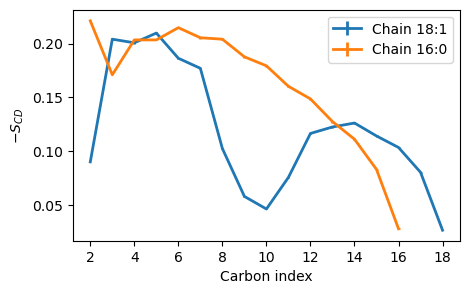

In [102]:
#ORDER PARAMETER -- POPC ONLY
prop_cycle = plt.rcParams['axes.prop_cycle']
color=prop_cycle.by_key()['color']

plt.figure(figsize=(5,3))
#POPC Scd
chain=[2, 3]
for c in chain:
    df = pd.read_csv(order_popc.format(c), sep='\t')
    x, y, e = df['Carbon'], df['scd_moy'], df['se_moy']
    if c==2:
        plt.errorbar(x, y, e, label='Chain 18:1', fmt='-', color=color[0], linewidth=2.0, alpha=1)
    elif c==3:
        plt.errorbar(x, y, e, label='Chain 16:0', fmt='-', color=color[1], linewidth=2.0, alpha=1)

plt.legend(loc='upper right')
plt.xlabel('Carbon index')
plt.ylabel('$-S_{CD}$')
#plt.title('MDP of POPC ')
plt.savefig(plots+'plot_scd_popc.png', bbox_inches='tight', transparent=True)
plt.show()

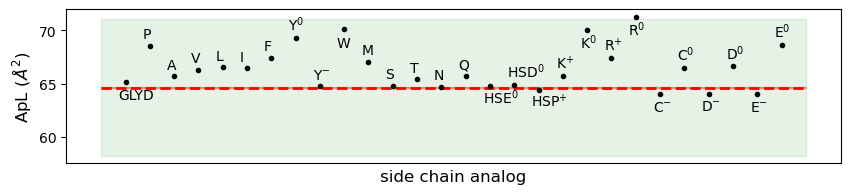

In [37]:
#AREA PER LIPID -- PLOT
df = pd.read_csv(apl, sep='\t', usecols=['name','apl','std_error'], skiprows=[2])
order_map = {name: i for i, name in enumerate(names)}
df = df.sort_values('name', key=lambda s: s.str.lower().map(order_map)).reset_index(drop=True)
plt.figure(figsize=(10, 2))
plt.errorbar(df['name'], df['apl'], df['std_error'], color='k', fmt='.', linewidth=1)
plt.xlabel("side chain analog", fontsize=12)
plt.ylabel('ApL ($\AA^2$)', fontsize=12)
plt.xticks([])  # Empty tick labels for aesthetics
# plt.legend(loc='best', prop={'size': 7})  # Uncomment if needed

#display(df)

#plt.legend(fontsize=12)
ref, se = apl_popc, apl_se_popc
plt.fill_between([-1, len(ll)], [ref-0.1*ref, ref-0.1*ref],
                 [ref+0.1*ref, ref+0.1*ref], color='green', alpha=0.1)
plt.fill_between([-1, len(ll)], [ref-se, ref-se],[ref+se, ref+se], color='red', alpha=0.3)
plt.plot([-1, len(ll)], [ref, ref], color='r', linestyle='--', linewidth=2)

for l in range(len(ll)):
    if df['name'][l] in ['glyd']:
        plt.text(l-0.3, df['apl'][l]-0.025*df['apl'][l], ll[l])
    elif df['name'][l] in ['sche', 'scw', 'sckn', 'scrn', 'schp', 'sce', 'sccm', 'scd']:
        plt.text(l-0.3, df['apl'][l]-0.025*df['apl'][l], ll[l])
    else:
        plt.text(l-0.3, df['apl'][l]+0.01*df['apl'][l], ll[l])


plt.savefig(plots+'plot_ApL.png', bbox_inches='tight')
#plt.ylim([apl_POPC-15, apl_POPC+15])
plt.show()


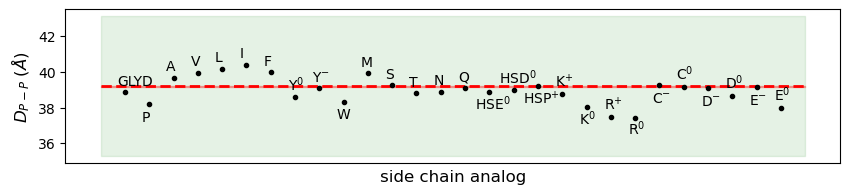

In [47]:
#THICKNESS -- PLOT
df = pd.read_csv(thk, sep='\t', usecols=['name','thickness','std_error'], skiprows=[2])
order_map = {name: i for i, name in enumerate(names)}
df = df.sort_values('name', key=lambda s: s.str.lower().map(order_map)).reset_index(drop=True)
#display(df)
plt.figure(figsize=(10, 2))
plt.errorbar(df['name'], df['thickness'], df['std_error'], color='k', fmt='.', linewidth=1)
plt.xlabel("side chain analog", fontsize=12)
plt.ylabel('$D_{P-P}$ ($\AA$)', fontsize=12)
plt.xticks([])  # Empty tick labels for aesthetics
# plt.legend(loc='best', prop={'size': 7})  # Uncomment if needed

#display(df)

#plt.legend(fontsize=12)
ref, se = thk_popc, thk_se_popc
plt.fill_between([-1, len(ll)], [ref-0.1*ref, ref-0.1*ref],
                 [ref+0.1*ref, ref+0.1*ref], color='green', alpha=0.1)
plt.fill_between([-1, len(ll)], [ref-se, ref-se],[ref+se, ref+se], color='red', alpha=0.3)
plt.plot([-1, len(ll)], [ref, ref], color='r', linestyle='--', linewidth=2)

for l in range(len(ll)):
    if df['name'][l] in ['scp']:
        plt.text(l-0.3, df['thickness'][l]-0.025*df['thickness'][l], ll[l])
    elif df['name'][l] in ['scw', 'sckn', 'scrn', 'sce', 'sccm', 'scd']:
        plt.text(l-0.3, df['thickness'][l]-0.025*df['thickness'][l], ll[l])
    elif df['name'][l] in ['sche', 'schp']:
        plt.text(l-0.6, df['thickness'][l]-0.025*df['thickness'][l], ll[l])
    elif df['name'][l] in ['schd']:
        plt.text(l-0.6, df['thickness'][l]+0.01*df['thickness'][l], ll[l])
    else:
        plt.text(l-0.3, df['thickness'][l]+0.01*df['thickness'][l], ll[l])


plt.savefig(plots+'plot_thk.png', bbox_inches='tight')
#plt.ylim([apl_POPC-15, apl_POPC+15])
plt.show()

L'aire de référence est :  140.126666
[2.833155967615764, 7.519388922020037, 2.966361877189033, 4.503066532675523, 4.857507992090536, 5.050190803797468, 6.02074340368592, 8.665968688643458, 2.5643227678020963, 10.095628051266136, 5.516436821525477, 1.5224304273392177, 2.5714820047170917, 1.6651591496510625, 3.123365541288191, 1.891147542181566, 2.1837392463187557, 2.109995252438236, 4.669580163992487, 9.79114068124621, 7.107850550015938, 11.565727254225836, 1.015750992034593, 4.005897778228746, 0.961033355350083, 4.514962198558259, 1.1537154534169738, 7.300535502643014]
L'aire de référence est :  101.029998
[6.080689024659801, 9.647297033500877, 3.7282619762102676, 6.182979435474214, 6.7999575729972905, 7.08700499033961, 8.525515362278844, 11.47513929476669, 5.760652395539007, 13.421759149198447, 7.727077258776157, 2.890224742952105, 4.077996715391407, 3.3026517529971646, 5.120582106712511, 4.193470339373863, 4.49371482715461, 4.892939817736128, 7.565411413746645, 12.204295005528966, 1

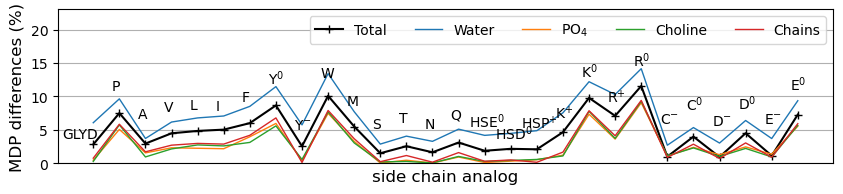

In [70]:
# ABSOLUTE DIFFERENCE BETWEEN DENSITY CURVES
# Create a dataframe ['name', 'area under curve'] including popc
profile = ["total", "water", "phosphate", "choline", "chains"]
profile_label = ['Total', 'Water', 'PO$_4$', 'Choline', 'Chains']

def auc(x, y):
    #fpr, tpr, thresholds = metrics.roc_curve(x, y, pos_label=1)
    #return metrics.auc(fpr, tpr)
    return np.abs(np.trapz(x, y))

def absolute_diff(f, g):
    return (np.abs(f-g) / f) *100

df_area = pd.DataFrame()
# Define reference area
data_profiles=[]
for p in profile:
    df = pd.read_csv(dens_popc.format(p), sep='\t')
    x, y = df['x'], df['dens_mean']
    ref = auc(x, y)
    print("L'aire de référence est : ", ref)

    auc_a = []

    #Calculate area of analogs
    for a in names:
        df = pd.read_csv(density.format(a, p), sep='\t')
        x, y = df['z'], df['dens_moy']
        auc_a.append(auc(x, y))
        
    results = []
    for g in auc_a:
        results.append(absolute_diff(ref, g))
    print(results)
    data_profiles.append(results)

    #display(d[0])
plt.figure(figsize=(10,2))
for i in range(len(profile)):
    if i==0:
        #for j in range(len(names)):
        #    x=[names[j], names[j]]
        #    y=[0,data_profiles[i][j]]
        #    plt.plot(x, y, color='k', linewidth=2, label=profile_label[i])
        plt.plot(names, data_profiles[i], marker='+', linestyle='-', color='k', linewidth=1.5, label=profile_label[0])
    else:
        plt.plot(names, data_profiles[i], linewidth=1, linestyle='-', label=profile_label[i])

#plt.legend(loc=[1.05, 0.45], fontsize=12)

for l in range(len(ll)):
    if names[l] in ['sche', 'schp']:
        plt.text(l-0.6, results[l]+5, ll[l])
    elif names[l] in ['schd']:
        plt.text(l-0.6, results[l]+3, ll[l])
    elif names[l] in ['glyd']:
        plt.text(l-1.2, results[l]+3, ll[l])
    else:
        plt.text(l-0.3, results[l]+5, ll[l])


plt.legend(loc='upper right', ncols=5, fontsize=10)
plt.xlabel("side chain analog", fontsize=12)
plt.ylabel('MDP differences (%)', fontsize=12)
plt.ylim([0, 23])
plt.xticks([])
plt.grid()
plt.savefig(plots+'density_all.png', bbox_inches='tight', transparent=True)
plt.show()



L'aire de référence est :  1.6790005
[0.7643237747695651, 4.576591847352037, 0.6852588787198066, 1.518314020752249, 1.4194158965408468, 2.6805531028728207, 4.655448286048769, 9.062951440455222, 1.7467237204515529, 8.596691900925576, 1.50914189721804, 0.655360138368045, 0.8238532388763119, 0.8044369254208137, 1.0818043234650614, 0.26762946169463026, 0.37769494410512555, 1.4289155959155693, 0.1886836841323192, 3.980254919519081, 6.700146902874662, 3.960689707954214, 2.9583969748668846, 1.7171525559402785, 2.9084267693785715, 1.8665271392116791, 2.997527397996619, 1.8365688396161803]
L'aire de référence est :  2.3133375000000003
[0.30287409424695433, 4.005727655389685, 0.9076496620142753, 1.815385779204275, 2.4493399687680544, 2.8890942199311462, 4.20031664208097, 6.137906812127476, 1.174407106615426, 4.055828429703829, 2.118216645863377, 0.0218947732442926, 0.5550638417438118, 0.5476719242220336, 1.390458590672573, 0.22309758087610426, 0.2808928658269565, 1.231445908778973, 0.35329907546

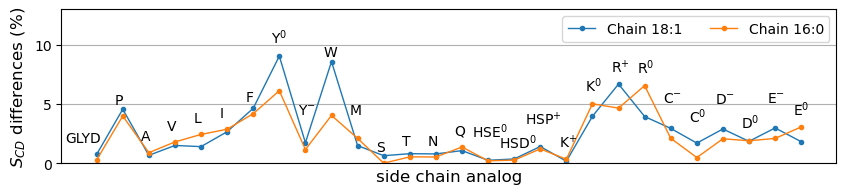

In [87]:
# ABSOLUTE DIFFERENCE BETWEEN ORDER PARAMETER CURVES
# Create a dataframe ['name', 'area under curve'] including popc
chain = [2, 3]
chain_label = ['Chain 18:1', 'Chain 16:0']

def auc(x, y):
    #fpr, tpr, thresholds = metrics.roc_curve(x, y, pos_label=1)
    #return metrics.auc(fpr, tpr)
    return np.abs(np.trapz(x, y))

def absolute_diff(f, g):
    return (np.abs(f-g) / f) *100

df_area = pd.DataFrame()
# Define reference area
data_chains=[]
for c in chain:
    df = pd.read_csv(order_popc.format(c), sep='\t')
    x, y = df['Carbon'], df['scd_moy']
    ref = auc(x, y)
    print("L'aire de référence est : ", ref)

    auc_a = []

    #Calculate area of analogs
    for a in names:
        df = pd.read_csv(order.format(a, c), sep='\t')
        x, y = df['Carbon'], df['scd_moy']
        auc_a.append(auc(x, y))
        
    results = []
    for g in auc_a:
        results.append(absolute_diff(ref, g))
    print(results)
    data_chains.append(results)

    #display(d[0])
plt.figure(figsize=(10,2))
for i in range(len(chain)):
        plt.plot(names, data_chains[i], linewidth=1, linestyle='-', marker='.', label=chain_label[i])

#plt.legend(loc=[1.05, 0.45], fontsize=12)

for l in range(len(ll)):
    if names[l] in ['sche', 'schp']:
        plt.text(l-0.6, results[l]+2, ll[l])
    elif names[l] in ['schd']:
        plt.text(l-0.6, results[l]+1, ll[l])
    elif names[l] in ['scy']:
        plt.text(l-0.3, results[l]+4, ll[l])
    elif names[l] in ['scw']:
        plt.text(l-0.3, results[l]+5, ll[l])
    elif names[l] in ['scm']:
        plt.text(l-0.3, results[l]+2, ll[l])
    elif names[l] in ['scym', 'scr', 'sce', 'scd', 'sccm', 'scc']:
        plt.text(l-0.3, results[l]+3, ll[l])
    elif names[l] in ['glyd']:
        plt.text(l-1.2, results[l]+1.5, ll[l])
    else:
        plt.text(l-0.3, results[l]+1, ll[l])


plt.legend(loc='upper right', ncols=2, fontsize=10)
plt.xlabel("side chain analog", fontsize=12)
plt.ylabel('$S_{CD}$ differences (%)', fontsize=12)
plt.ylim([0, 13])
plt.xticks([])
plt.grid()
plt.savefig(plots+'order_all.png', bbox_inches='tight', transparent=True)
plt.show()

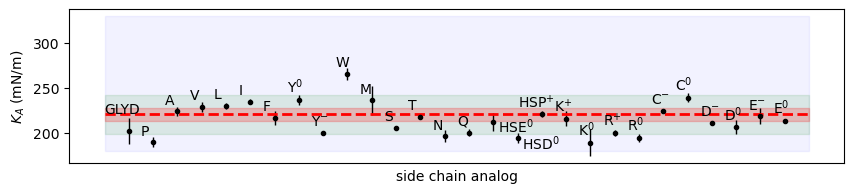

In [101]:
#AREA COMPRESSIBILITY MODULUS
def acm(x, y, z):
    """
    Calculates the area compressibility modulus K_A using the formula:
    K_A = k_B * T * (<A> / <(ΔA)^2>)
    Parameters:
        x, y, z : arrays of box dimensions over time (same length)
    Returns:
        K_A : area compressibility modulus (in g·s⁻², equivalent to dyn/cm)
    """
    k_B = 1.380649  # Boltzmann constant in A²·g·s⁻²·K⁻¹
    T = 303.15      # Temperature in Kelvin
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    z = np.asarray(z, dtype=float)
    # Compute surface area A over time (in Å²)
    A = 2 * (x * y + x * z + y * z)
    # Mean surface area
    Aa = np.mean(A)
    # Mean square fluctuation of A (i.e., variance)
    dAa = np.var(A, ddof=0)
    # Area compressibility modulus
    K_a = k_B * T * (Aa / dAa) if dAa != 0 else np.nan  # Avoid division by zero
    return K_a

def get_acm(names):
    acm_list=[]
    se_list=[]
    for a in names:
        df = pd.read_csv(box.format(a), sep='\t', skiprows=range(1, skip-1000))
        temp = []
        for i in range(1,4):
            x, y, z = df[f'x{i}'], df[f'y{i}'], df[f'z{i}']
            temp.append(acm(x, y, z))
        acm_list.append(np.mean(temp))
        se_list.append(np.std(temp) / np.sqrt(len(temp)))
    df_final = pd.DataFrame({'names' : names, 'acm_moy': acm_list, 'std_error' : se_list})
    return df_final



plt.figure(figsize=(10,2))
df = get_acm(names)
plt.errorbar(df['names'], df['acm_moy'], df['std_error'], color='k', linewidth=1, fmt='.')


#plt.legend()

for l in range(len(ll)):
    if names[l] in ['sche', 'schd']:
        plt.text(l+0.2, df['acm_moy'][l]-12, ll[l])
    elif names[l] in ['schp']:
        plt.text(l-1, df['acm_moy'][l]+8, ll[l])
    elif names[l] in ['glyd']:
        plt.text(l-1, df['acm_moy'][l]+20, ll[l])
    else:
        plt.text(l-0.5, df['acm_moy'][l]+8, ll[l])

ref, se = acm_popc, acm_se_popc
#Experimental range
plt.fill_between([-1, len(ll)], [180, 180],[330, 330], color='blue', alpha=0.05)

plt.fill_between([-1, len(ll)], [ref-0.1*ref, ref-0.1*ref],[ref+0.1*ref, ref+0.1*ref], color='green', alpha=0.1)
plt.fill_between([-1, len(ll)], [ref-se, ref-se],[ref+se, ref+se], color='red', alpha=0.2)
plt.plot([-1, len(ll)], [ref, ref], color='r', linestyle='--', linewidth=2)
plt.xticks([])

plt.xlabel('side chain analog')
plt.ylabel('$K_A$ (mN/m)')
plt.savefig(plots+'plot_acm.png', bbox_inches='tight')

plt.show()
cell_launch=1

,names,wdp_mean,std_error
0,glyd,9.500000,0.000000
1,scp,8.500000,0.000000
2,sca,9.500000,0.000000
3,scv,10.500000,0.000000
4,scl,10.500000,0.000000
5,sci,10.500000,0.000000
6,scf,10.333333,0.152145
7,scy,9.500000,0.000000
8,scym,9.500000,0.000000
9,scw,9.500000,0.000000


Text(0, 0.5, '$D_{H₂O}$ ($\\AA$)')

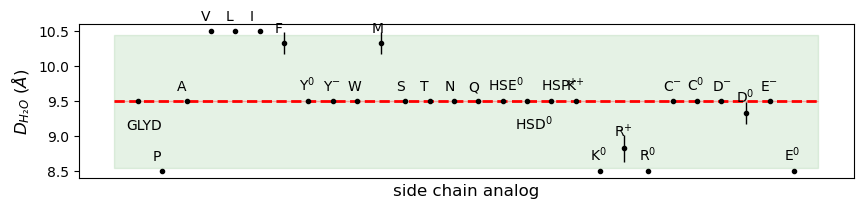

In [42]:
#WATER DEPTH PENETRATION
def get_wdp(names):
    wdp_list, se_list = [], []
    for a in names:
        z_cutoffs=[]  
        for i in range(1,4):
            df = pd.read_csv(density.format(a, 'water'), sep='\t')
            df_filtered = df[(df['z'] > -40) & (df['z'] < 40)]
            below_threshold = df_filtered[df_filtered[f'dens_{i}'] < 0.01]
            z_cutoffs.append(below_threshold['z'].max())
            z_cutoffs.append(np.abs(below_threshold['z'].min()))
        wdp_list.append(np.mean(z_cutoffs))
        se_list.append(np.std(z_cutoffs) / np.sqrt(len(z_cutoffs)))
    df_final = pd.DataFrame({'names' : names, 'wdp_mean': wdp_list, 'std_error' : se_list})
    return df_final


df=get_wdp(names)
display(df)

plt.figure(figsize=(10,2))

plt.errorbar(ll, df['wdp_mean'], df['std_error'], color='k', linewidth=1, fmt='.')
for l in range(len(ll)):
    if names[l] in ['glyd', 'schd']:
        plt.text(l-0.5, df['wdp_mean'][l]-0.4, ll[l])
    elif names[l] in ['sche']:
        plt.text(l-0.6, df['wdp_mean'][l]+0.15, ll[l])
    else:
        plt.text(l-0.4, df['wdp_mean'][l]+0.15, ll[l])
        

#fonction pour ajouter un nouvel acide aminé

#remettre le bon nombre de trajectoires
traj=[1, 2, 3]

ref, se = wdp_popc, wdp_se_popc
#plt.legend(loc='lower right', fontsize=12)
plt.fill_between([-1, len(ll)], [ref-0.1*ref, ref-0.1*ref],[ref+0.1*ref, ref+0.1*ref], color='green', alpha=0.1)
plt.fill_between([-1, len(ll)], [ref-se, ref-se],[ref+se, ref+se], color='red', alpha=0.3)
plt.plot([-1, len(ll)], [ref, ref], color='r', linestyle='--', linewidth=2)
plt.xticks([])

plt.xlabel("side chain analog", fontsize=12)
plt.ylabel('$D_{H₂O}$ ($\AA$)', fontsize=12)
#plt.savefig(plots+'wpd_all.png', bbox_inches='tight')
